In [138]:
import pandas as pd
import numpy as np

dataframe = pd.read_csv('./wearable_tech_sleep_quality_1.csv')

In [139]:
dataframe.head()

,Heart_Rate_Variability,Body_Temperature,Movement_During_Sleep,Sleep_Duration_Hours,Sleep_Quality_Score,Caffeine_Intake_mg,Stress_Level,Bedtime_Consistency,Light_Exposure_hours
0,79.934283,37.199678,1.324822,4.638289,1.0,107.624032,2.771837,0.657037,7.933949
1,67.234714,36.962317,1.855481,6.209422,1.0,104.658589,3.738138,0.144464,6.992699
2,82.953771,36.529815,1.207580,6.879592,10.0,0.000000,3.115880,0.642949,7.655250
3,100.460597,36.176532,1.692038,10.331531,1.0,116.990981,3.904008,0.453255,9.429463
4,65.316933,36.849112,0.106385,8.334830,1.0,223.282908,4.571699,0.641492,10.555713


In [140]:
dataframe.isnull().sum()

Heart_Rate_Variability    0
Body_Temperature          0
Movement_During_Sleep     0
Sleep_Duration_Hours      0
Sleep_Quality_Score       0
Caffeine_Intake_mg        0
Stress_Level              0
Bedtime_Consistency       0
Light_Exposure_hours      0
dtype: int64

In [141]:
x = (dataframe == 0).sum()
x

Heart_Rate_Variability     0
Body_Temperature           0
Movement_During_Sleep      0
Sleep_Duration_Hours       0
Sleep_Quality_Score        0
Caffeine_Intake_mg        76
Stress_Level               5
Bedtime_Consistency        8
Light_Exposure_hours       0
dtype: int64

In [142]:
means = dataframe.replace(0, np.nan).mean()
df = dataframe.replace(0, means)
df.isna().sum()

Heart_Rate_Variability    0
Body_Temperature          0
Movement_During_Sleep     0
Sleep_Duration_Hours      0
Sleep_Quality_Score       0
Caffeine_Intake_mg        0
Stress_Level              0
Bedtime_Consistency       0
Light_Exposure_hours      0
dtype: int64

<Axes: >

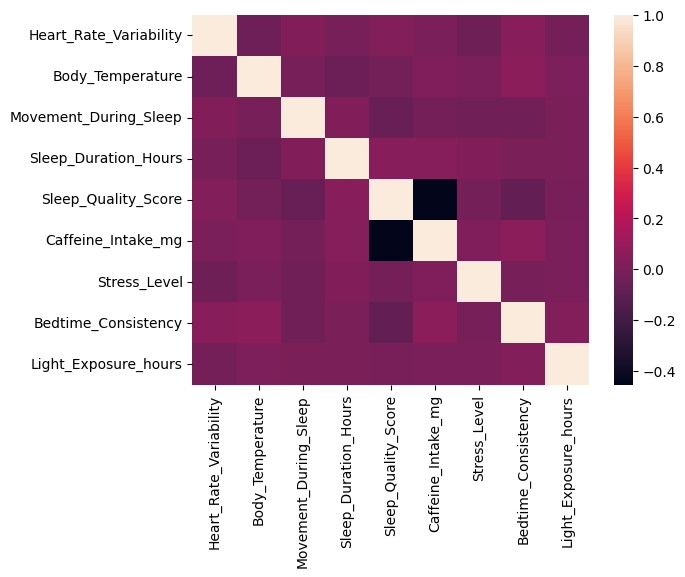

In [143]:
import seaborn as sns
sns.heatmap(df.corr())

In [144]:

X = df.drop(columns='Sleep_Duration_Hours')
y = df['Sleep_Duration_Hours']
print(X.head(), y.head())

   Heart_Rate_Variability  Body_Temperature  Movement_During_Sleep  \
0               79.934283         37.199678               1.324822   
1               67.234714         36.962317               1.855481   
2               82.953771         36.529815               1.207580   
3              100.460597         36.176532               1.692038   
4               65.316933         36.849112               0.106385   

   Sleep_Quality_Score  Caffeine_Intake_mg  Stress_Level  Bedtime_Consistency  \
0                  1.0          107.624032      2.771837             0.657037   
1                  1.0          104.658589      3.738138             0.144464   
2                 10.0          160.454706      3.115880             0.642949   
3                  1.0          116.990981      3.904008             0.453255   
4                  1.0          223.282908      4.571699             0.641492   

   Light_Exposure_hours  
0              7.933949  
1              6.992699  
2             

In [145]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(800, 8) (200, 8) (800,) (200,)


In [146]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [148]:
from sklearn.metrics import mean_absolute_error, r2_score
print(y_pred.shape, y_test.shape)
acc = mean_absolute_error(y_pred=y_pred, y_true=y_test)
r2 = r2_score(y_pred=y_pred, y_true=y_test)
print(acc, r2)

(200,) (200,)
1.2476815326748116 -0.04008886871391759
